In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [3]:
pd.set_option("display.max_columns", 200)

In [4]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
306,307,60,RL,116.0,13474,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,HdBoard,Plywood,BrkFace,246.0,Gd,TA,CBlock,Gd,TA,No,ALQ,700,Unf,0,0,700,GasA,Gd,Y,SBrkr,1122,1121,0,2243,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1990.0,RFn,3,746,TA,TA,Y,127,44,224,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,225000
871,872,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,116.0,TA,TA,PConc,Gd,TA,No,GLQ,505,Unf,0,299,804,GasA,Ex,Y,SBrkr,804,878,0,1682,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1998.0,RFn,2,523,TA,TA,Y,0,77,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200500
372,373,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1984,1984,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,623,LwQ,121,0,744,GasA,TA,Y,SBrkr,752,0,0,752,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1984.0,Unf,1,264,TA,TA,Y,353,0,0,0,90,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,125000
1213,1214,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,NaN,Attchd,1965.0,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1341,1342,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,6,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,814,Unf,0,300,1114,GasA,Ex,Y,SBrkr,1114,0,0,1114,1,0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,2004.0,Unf,2,576,TA,TA,Y,0,78,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,155000


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1117,2578,30,RM,46.0,3672,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1Story,5,7,1922,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,Ex,Y,SBrkr,816,0,0,816,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1922.0,Unf,1.0,100.0,Fa,Fa,N,0,0,96,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
1136,2597,20,RL,NaN,7777,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,203.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1491.0,1491.0,GasA,Ex,Y,SBrkr,1491,0,0,1491,0.0,0.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1996.0,Fin,2.0,571.0,TA,TA,Y,0,35,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
524,1985,120,RL,NaN,3940,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,143.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1073.0,Unf,0.0,342.0,1415.0,GasA,Ex,Y,SBrkr,1455,0,0,1455,1.0,0.0,2,0,2,1,Gd,6,Typ,1,TA,Attchd,2003.0,Fin,3.0,644.0,TA,TA,Y,156,20,0,0,144,0,NaN,NaN,NaN,0,8,2008,WD,Normal
442,1903,90,RL,NaN,8145,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Crawfor,Norm,Norm,Duplex,2.5Unf,7,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,246.0,Unf,0.0,674.0,920.0,GasA,Ex,Y,SBrkr,1240,1240,0,2480,0.0,0.0,2,1,5,2,TA,13,Typ,2,Gd,Detchd,1940.0,Unf,2.0,400.0,TA,TA,Y,0,0,57,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1310,2771,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1Story,5,6,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,468.0,Unf,0.0,396.0,864.0,GasA,Gd,Y,SBrkr,864,0,0,864,0.0,1.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1962.0,Unf,1.0,336.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,2,2006,WD,Normal


In [7]:
test_df.shape

(1459, 80)

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

In [10]:
def clean_df(df):
    na_object_cols = []
    na_float_cols = []
    for col in df.columns:
        sum_na_vals_col = df[col].isnull().sum()
        if sum_na_vals_col > 0:
            if df[col].dtype == object:
                na_object_cols.append(col)
            elif df[col].dtype == float or df[col].dtype == int:
                na_float_cols.append(col)
            print(col + " " + str(sum_na_vals_col))
    print("\n")
    for col in na_float_cols:
        df[col] = imp.fit_transform(df[col].values.reshape(-1, 1)).reshape(1, -1)[0]
        
    for col in na_object_cols:
        df.loc[df[col].isna(), col] = "None"
        
    na_cols = na_float_cols + na_object_cols
    for col in na_cols:
        print(col + " " + str(train_df[col].isna().sum()))
    print("\n")

In [11]:
clean_df(train_df)
clean_df(test_df)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


LotFrontage 0
MasVnrArea 0
GarageYrBlt 0
Alley 0
MasVnrType 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinType2 0
Electrical 0
FireplaceQu 0
GarageType 0
GarageFinish 0
GarageQual 0
GarageCond 0
PoolQC 0
Fence 0
MiscFeature 0


MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


LotFrontage 0
MasVnrArea 0
BsmtFi

In [12]:
train_df = train_df.drop(columns="Id")

In [13]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [14]:
train_df.shape

(1460, 80)

In [15]:
numeric = []
categorical = []
for col in train_df.columns:
    if train_df[col].dtype == np.float64 or train_df[col].dtype == np.int64:
        numeric.append(col)
    elif train_df[col].dtype == object:
        categorical.append(col)

In [16]:
numeric

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

C:\Users\artem\AppData\Local\Temp/ipykernel_11464/187991268.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots()


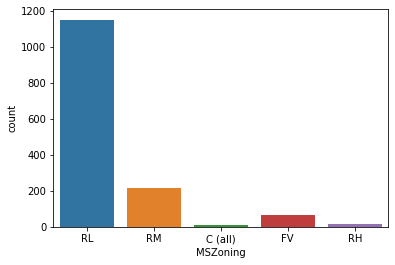

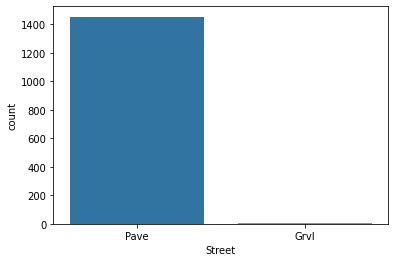

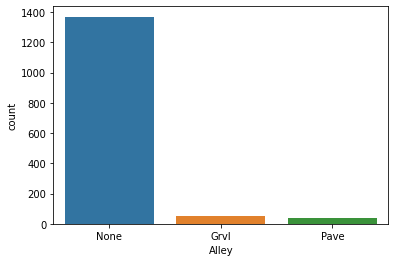

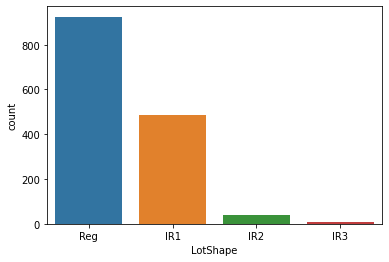

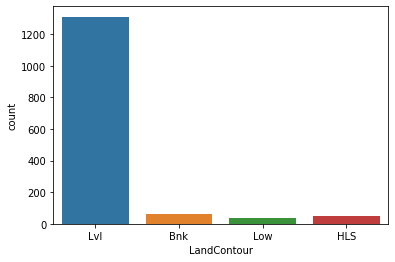

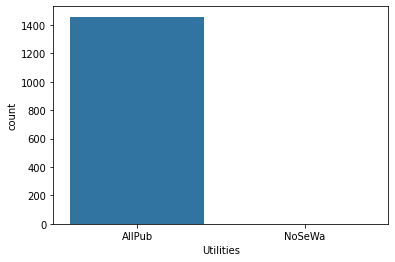

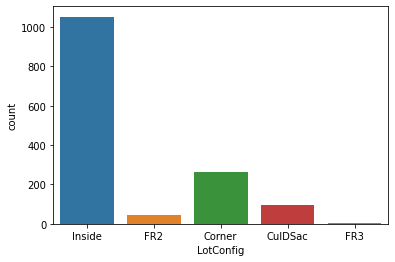

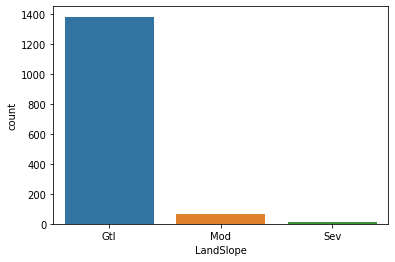

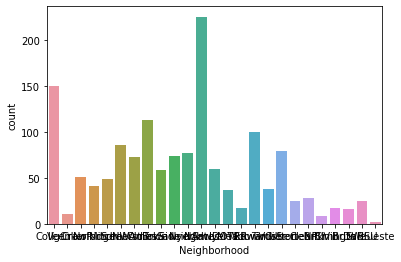

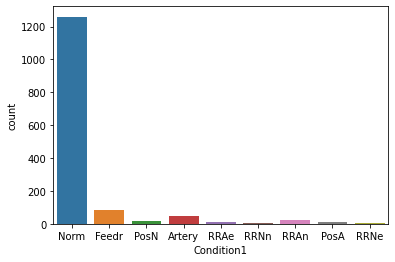

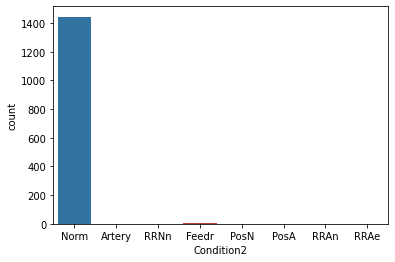

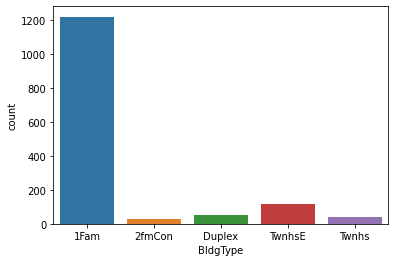

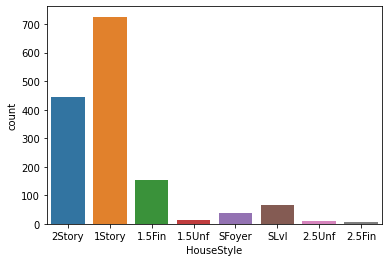

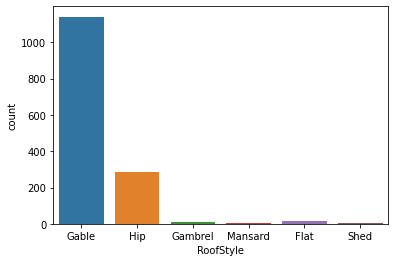

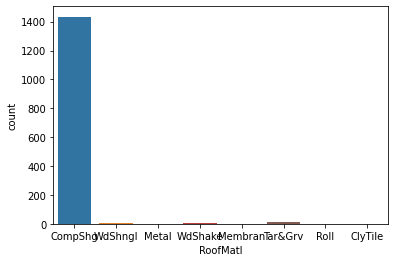

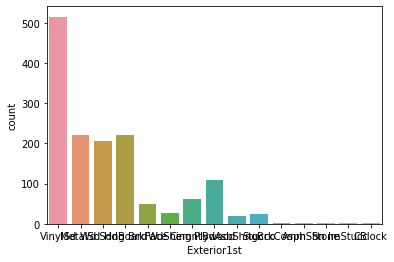

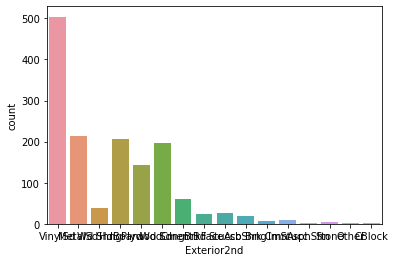

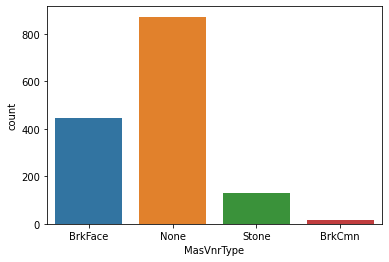

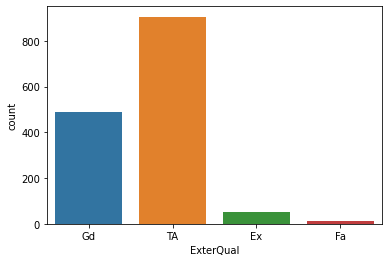

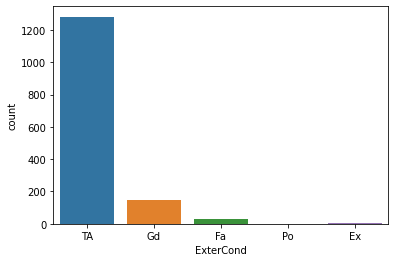

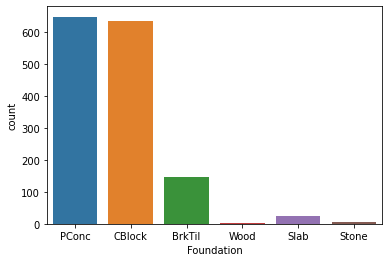

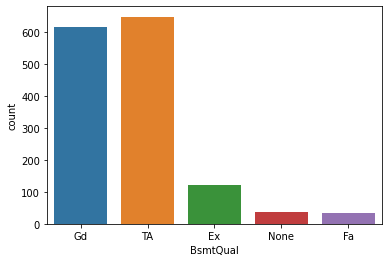

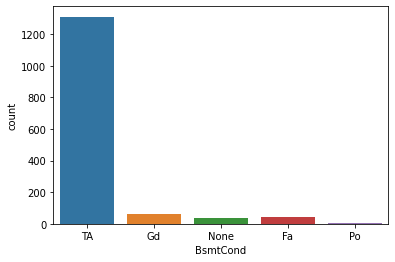

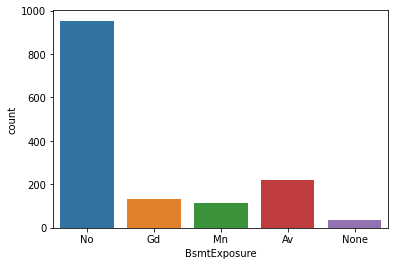

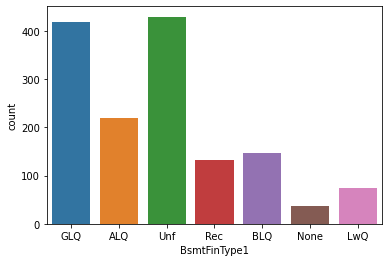

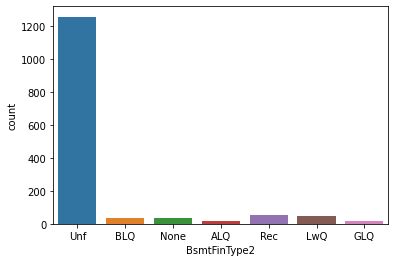

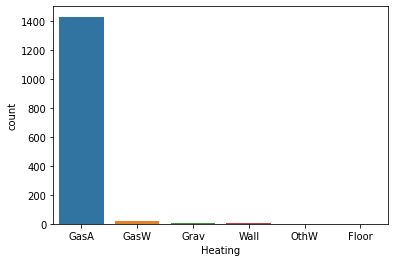

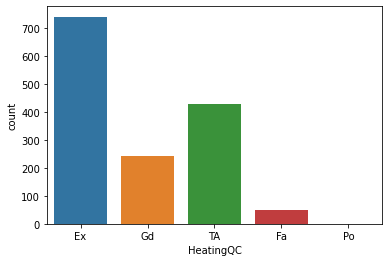

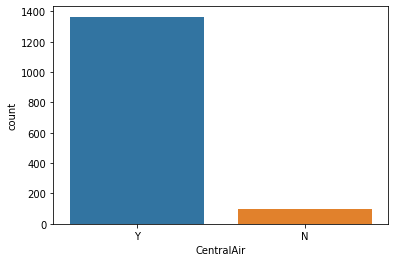

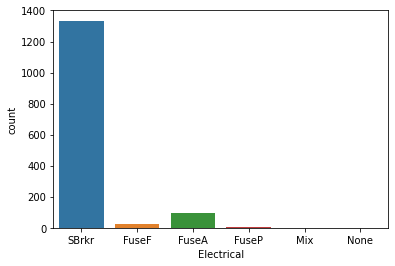

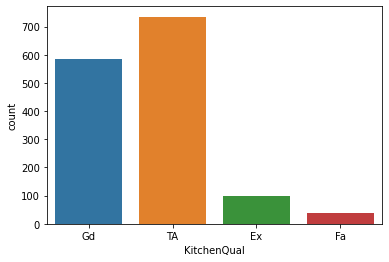

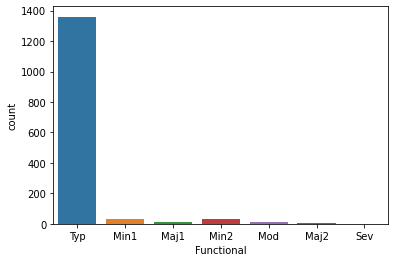

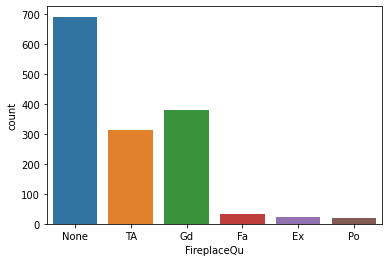

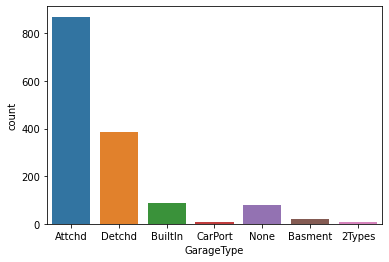

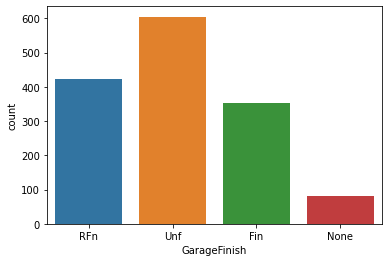

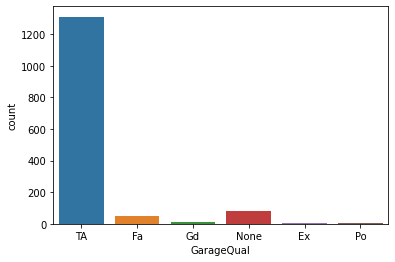

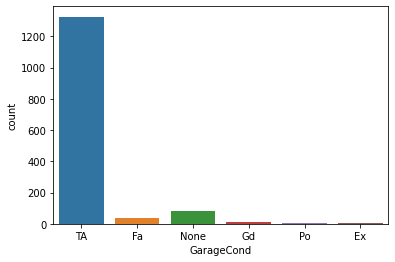

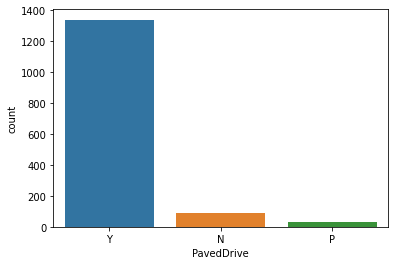

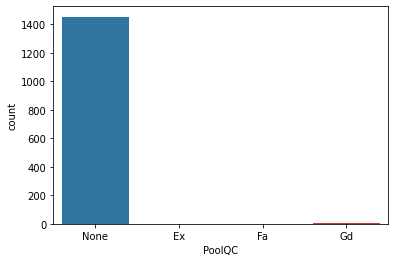

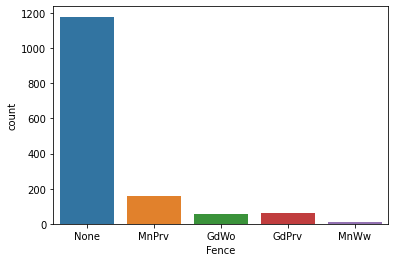

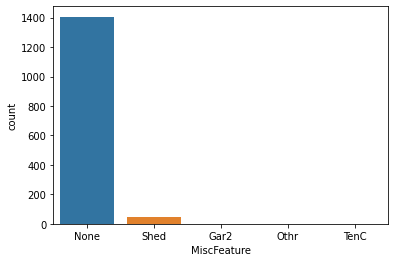

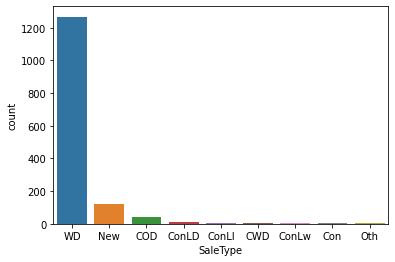

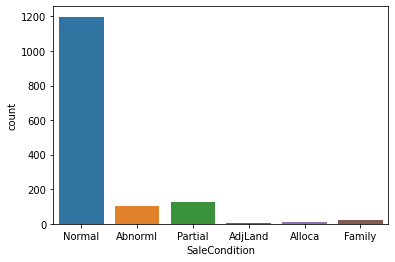

In [18]:
for col in categorical:
    f, ax = plt.subplots()
    sns.countplot(data=train_df, x=col)

c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


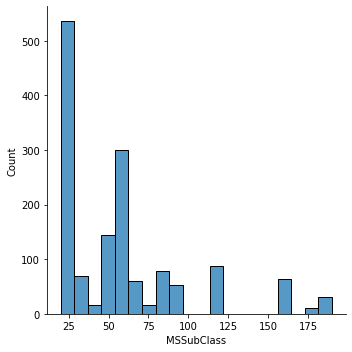

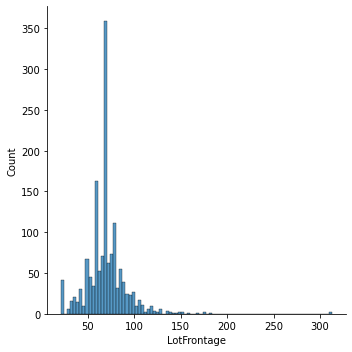

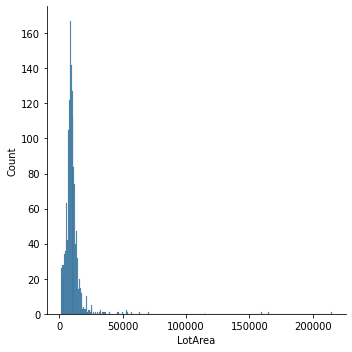

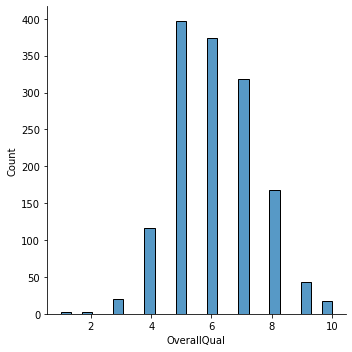

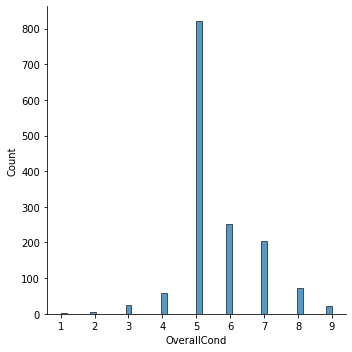

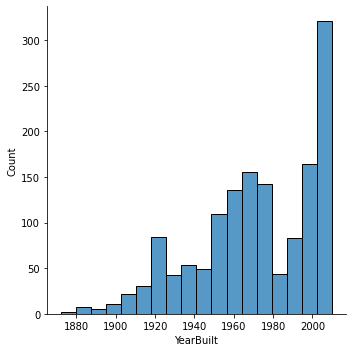

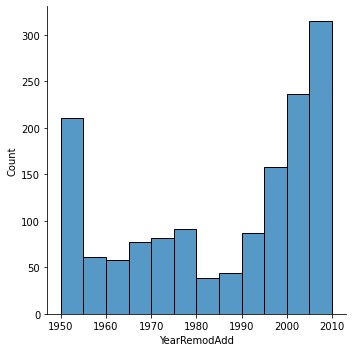

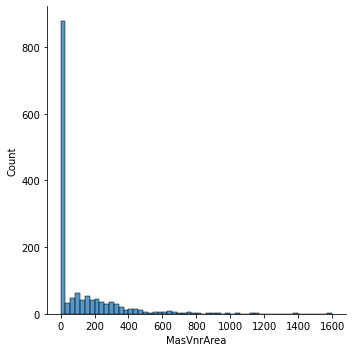

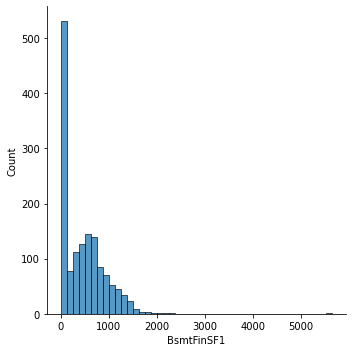

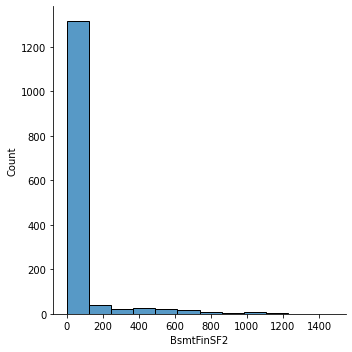

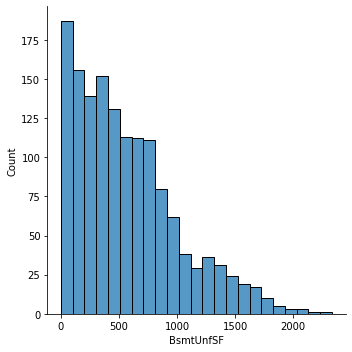

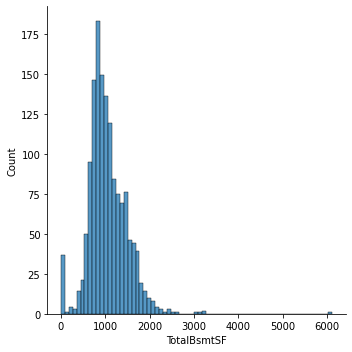

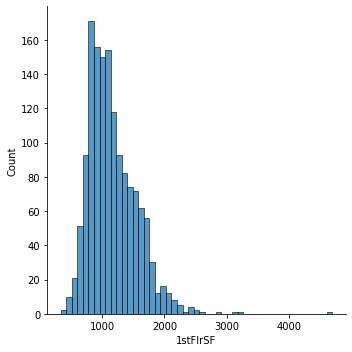

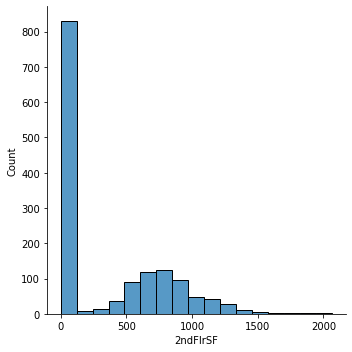

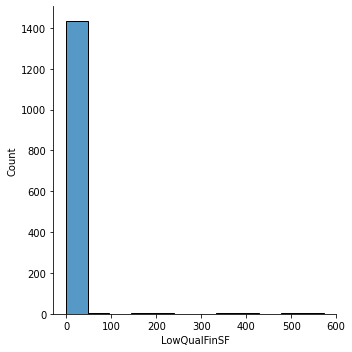

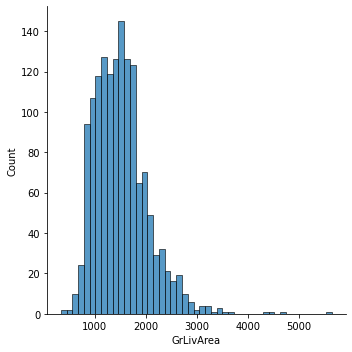

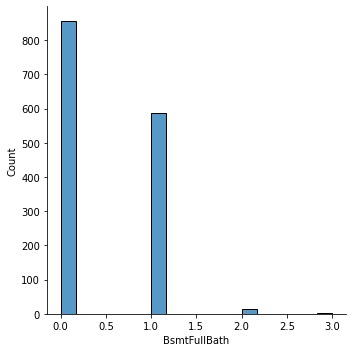

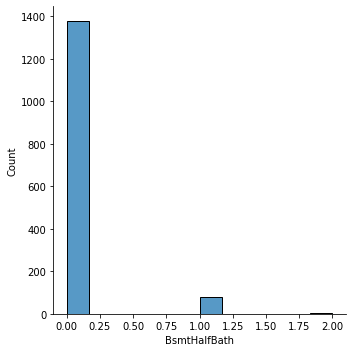

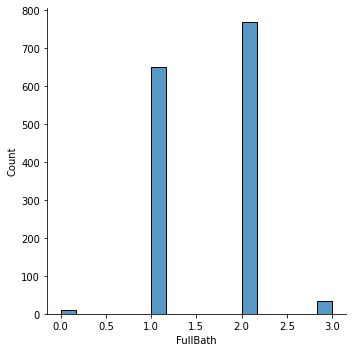

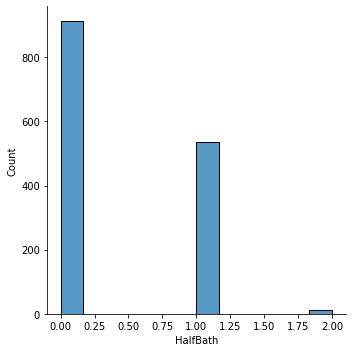

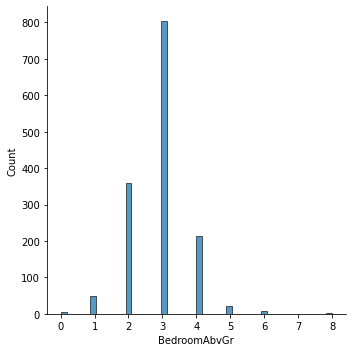

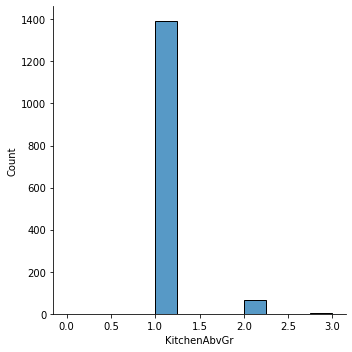

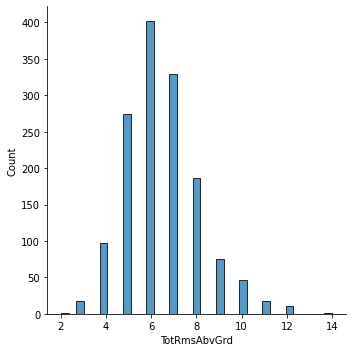

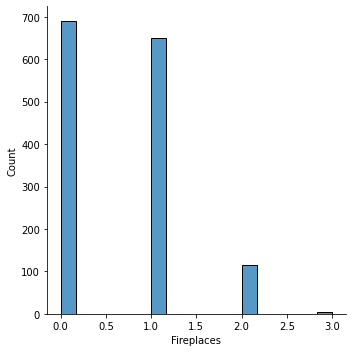

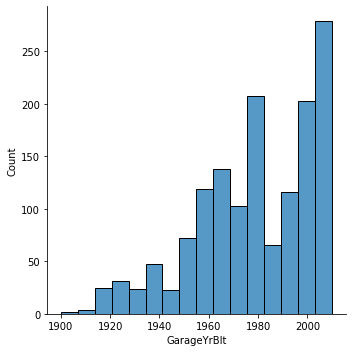

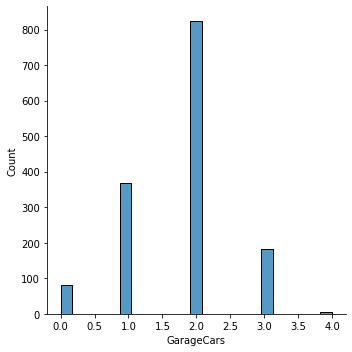

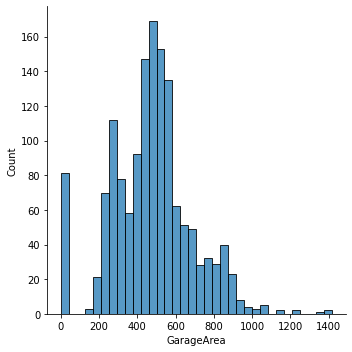

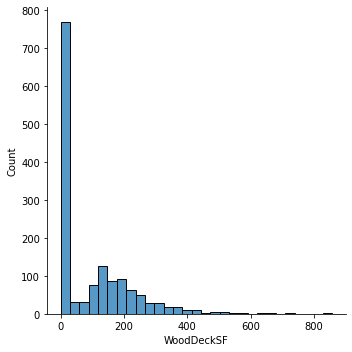

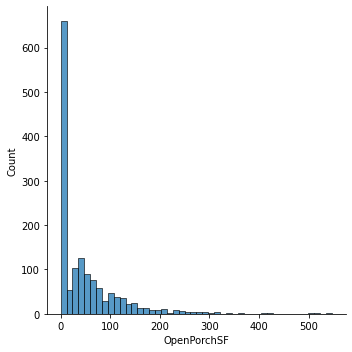

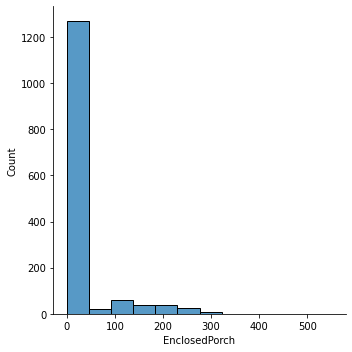

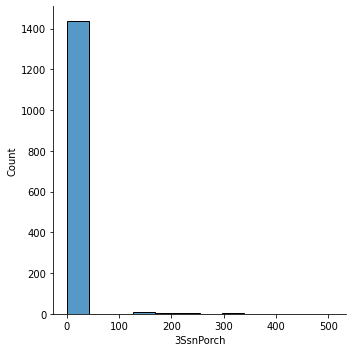

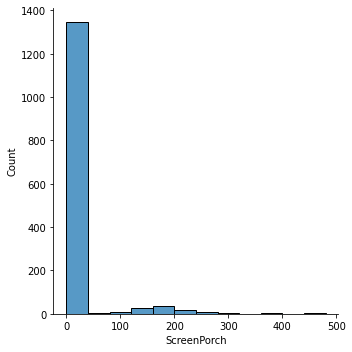

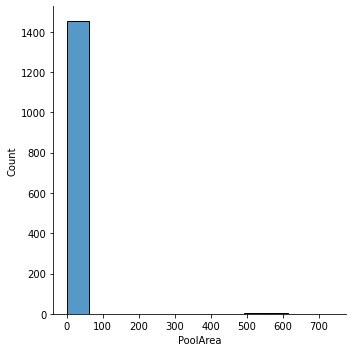

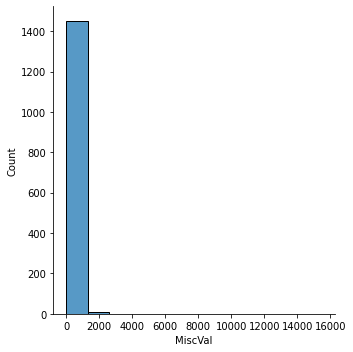

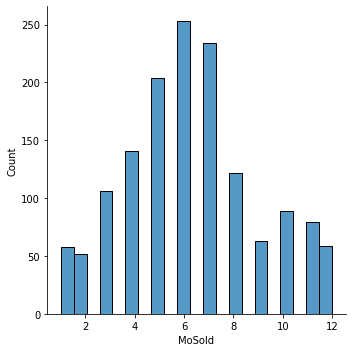

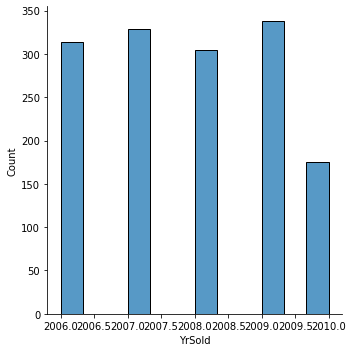

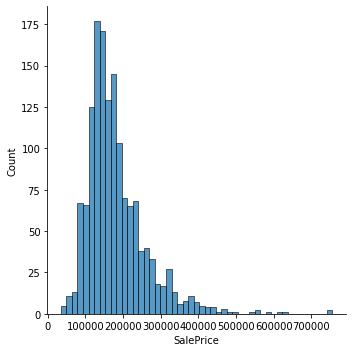

In [19]:
for col in numeric:
    sns.displot(data=train_df, x=col)

<AxesSubplot:>

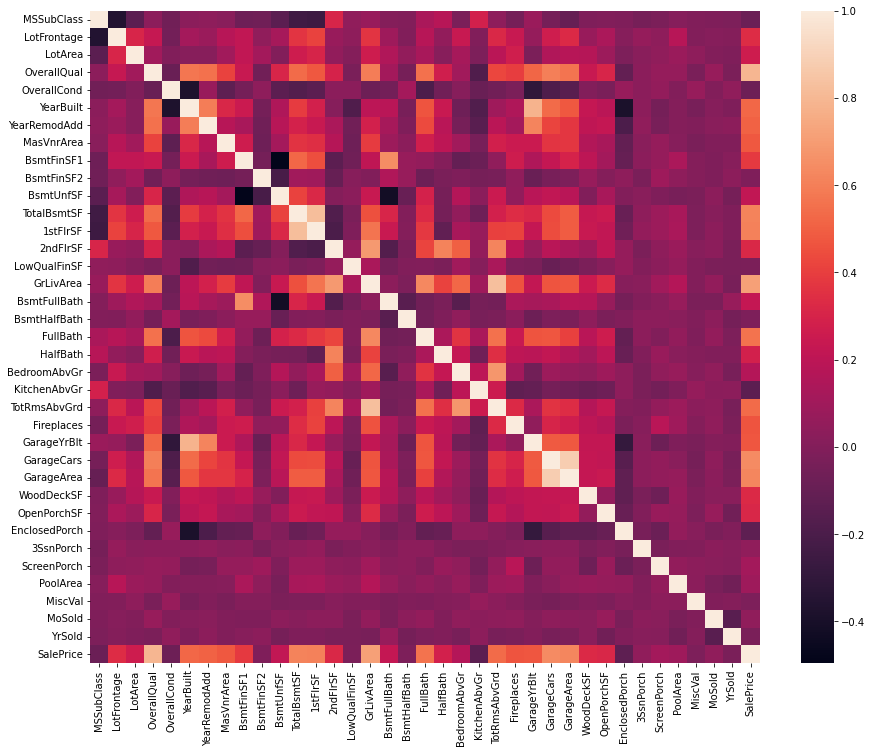

In [20]:
corr = train_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr)

In [21]:
continious = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BedroomAbvGr", "GarageYrBlt", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "PoolArea", "MoSold", "YrSold"]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [23]:
label = "SalePrice"
features = train_df.drop(columns=label).columns

In [24]:
x, y = train_df[features], train_df[label]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [26]:
scaler = StandardScaler()

In [27]:
train_df[label] = scaler.fit_transform(train_df[label].values.reshape(-1, 1)).reshape(1, -1)[0]

In [28]:
transformer = ColumnTransformer([("scaler", StandardScaler(), continious)])

In [29]:
pipe = Pipeline([("transformer", transformer), ("model", GradientBoostingRegressor())])

In [30]:
model = pipe.fit(x_train, y_train)

In [31]:
predictions = model.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
print("RMSE " + str(np.sqrt(mean_squared_error(y_test, predictions))))

RMSE 32427.41592085982


In [41]:
test_df_x = test_df[test_df.drop(columns="Id").columns]

In [42]:
sub_predictions = model.predict(test_df_x)

In [44]:
sub_df = pd.DataFrame({"Id": test_df["Id"], "SalePrice": sub_predictions})

In [45]:
sub_df.head()

,Id,SalePrice
0,1461,129584.083947
1,1462,162205.065433
2,1463,193900.742968
3,1464,187908.248510
4,1465,177025.012875


In [46]:
sub_df.to_csv("submission.csv", index=False)